In [20]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np
import geopandas as pgd

In [33]:
files = ['C:/CDT/Rainfall_Climatology/output/CLIMATOLOGY_data/Aggregated_Data_seasonal/chirps_1991-03_1991-05.nc','C:/CDT/Rainfall_Climatology/output/CLIMATOLOGY_data/Aggregated_Data_seasonal/chirps_1992-03_1992-05.nc',
             'C:/CDT/Rainfall_Climatology/output/CLIMATOLOGY_data/Aggregated_Data_seasonal/chirps_1993-03_1993-05.nc',
             'C:/CDT/Rainfall_Climatology/output/CLIMATOLOGY_data/Aggregated_Data_seasonal/chirps_1994-03_1994-05.nc',
             'C:/CDT/Rainfall_Climatology/output/CLIMATOLOGY_data/Aggregated_Data_seasonal/chirps_1995-03_1995-05.nc',
             'C:/CDT/Rainfall_Climatology/output/CLIMATOLOGY_data/Aggregated_Data_seasonal/chirps_1996-03_1996-05.nc',
             'C:/CDT/Rainfall_Climatology/output/CLIMATOLOGY_data/Aggregated_Data_seasonal/chirps_1997-03_1997-05.nc',
             'C:/CDT/Rainfall_Climatology/output/CLIMATOLOGY_data/Aggregated_Data_seasonal/chirps_1998-03_1998-05.nc',
             'C:/CDT/Rainfall_Climatology/output/CLIMATOLOGY_data/Aggregated_Data_seasonal/chirps_1999-03_1999-05.nc',
             'C:/CDT/Rainfall_Climatology/output/CLIMATOLOGY_data/Aggregated_Data_seasonal/chirps_2000-03_2000-05.nc',
         'C:/CDT/Rainfall_Climatology/output/CLIMATOLOGY_data/Aggregated_Data_seasonal/chirps_2001-03_2001-05.nc',
         'C:/CDT/Rainfall_Climatology/output/CLIMATOLOGY_data/Aggregated_Data_seasonal/chirps_2002-03_2002-05.nc',
          'C:/CDT/Rainfall_Climatology/output/CLIMATOLOGY_data/Aggregated_Data_seasonal/chirps_2003-03_2003-05.nc',
          'C:/CDT/Rainfall_Climatology/output/CLIMATOLOGY_data/Aggregated_Data_seasonal/chirps_2004-03_2004-05.nc',
          'C:/CDT/Rainfall_Climatology/output/CLIMATOLOGY_data/Aggregated_Data_seasonal/chirps_2005-03_2005-05.nc',
          'C:/CDT/Rainfall_Climatology/output/CLIMATOLOGY_data/Aggregated_Data_seasonal/chirps_2006-03_2006-05.nc',
          'C:/CDT/Rainfall_Climatology/output/CLIMATOLOGY_data/Aggregated_Data_seasonal/chirps_2007-03_2007-05.nc',
          'C:/CDT/Rainfall_Climatology/output/CLIMATOLOGY_data/Aggregated_Data_seasonal/chirps_2008-03_2008-05.nc',
          'C:/CDT/Rainfall_Climatology/output/CLIMATOLOGY_data/Aggregated_Data_seasonal/chirps_2009-03_2009-05.nc',
          'C:/CDT/Rainfall_Climatology/output/CLIMATOLOGY_data/Aggregated_Data_seasonal/chirps_2010-03_2010-05.nc',
          'C:/CDT/Rainfall_Climatology/output/CLIMATOLOGY_data/Aggregated_Data_seasonal/chirps_2011-03_2011-05.nc',
          'C:/CDT/Rainfall_Climatology/output/CLIMATOLOGY_data/Aggregated_Data_seasonal/chirps_2012-03_2012-05.nc',
          'C:/CDT/Rainfall_Climatology/output/CLIMATOLOGY_data/Aggregated_Data_seasonal/chirps_2013-03_2013-05.nc',
          'C:/CDT/Rainfall_Climatology/output/CLIMATOLOGY_data/Aggregated_Data_seasonal/chirps_2014-03_2014-05.nc',
          'C:/CDT/Rainfall_Climatology/output/CLIMATOLOGY_data/Aggregated_Data_seasonal/chirps_2015-03_2015-05.nc',
          'C:/CDT/Rainfall_Climatology/output/CLIMATOLOGY_data/Aggregated_Data_seasonal/chirps_2016-03_2016-05.nc',
          'C:/CDT/Rainfall_Climatology/output/CLIMATOLOGY_data/Aggregated_Data_seasonal/chirps_2017-03_2017-05.nc',
          'C:/CDT/Rainfall_Climatology/output/CLIMATOLOGY_data/Aggregated_Data_seasonal/chirps_2018-03_2018-05.nc',
          'C:/CDT/Rainfall_Climatology/output/CLIMATOLOGY_data/Aggregated_Data_seasonal/chirps_2019-03_2019-05.nc',
          'C:/CDT/Rainfall_Climatology/output/CLIMATOLOGY_data/Aggregated_Data_seasonal/chirps_2020-03_2020-05.nc'
         ] 

In [50]:
datasets = [xr.open_dataset(f) for f in files]

# Concatenate datasets along the 'time' dimension
combined_ds = xr.concat(datasets, dim='time')
datasets


[<xarray.Dataset>
 Dimensions:  (Lon: 610, Lat: 710)
 Coordinates:
   * Lon      (Lon) float64 21.53 21.58 21.63 21.68 ... 51.83 51.88 51.93 51.98
   * Lat      (Lat) float64 -11.98 -11.93 -11.88 -11.83 ... 23.37 23.42 23.47
 Data variables:
     precip   (Lat, Lon) float32 ...,
 <xarray.Dataset>
 Dimensions:  (Lon: 610, Lat: 710)
 Coordinates:
   * Lon      (Lon) float64 21.53 21.58 21.63 21.68 ... 51.83 51.88 51.93 51.98
   * Lat      (Lat) float64 -11.98 -11.93 -11.88 -11.83 ... 23.37 23.42 23.47
 Data variables:
     precip   (Lat, Lon) float32 ...,
 <xarray.Dataset>
 Dimensions:  (Lon: 610, Lat: 710)
 Coordinates:
   * Lon      (Lon) float64 21.53 21.58 21.63 21.68 ... 51.83 51.88 51.93 51.98
   * Lat      (Lat) float64 -11.98 -11.93 -11.88 -11.83 ... 23.37 23.42 23.47
 Data variables:
     precip   (Lat, Lon) float32 ...,
 <xarray.Dataset>
 Dimensions:  (Lon: 610, Lat: 710)
 Coordinates:
   * Lon      (Lon) float64 21.53 21.58 21.63 21.68 ... 51.83 51.88 51.93 51.98
   * Lat     

In [35]:
variable_name = 'precip'  
average_data = combined_ds[variable_name].mean(dim='time')

In [28]:
import geopandas as gpd

In [36]:
# importing the shapefile
shapefile_path = ("C:/CDT/GHA.shp")
shapefile = gpd.read_file("C:/CDT/GHA.shp")

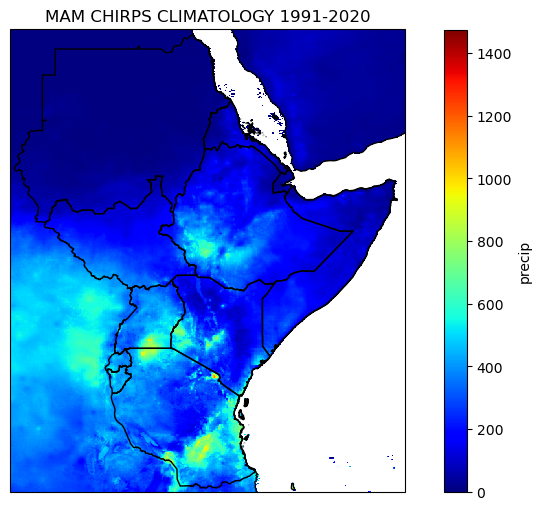

In [49]:
fig, ax = plt.subplots(figsize=(10, 6), subplot_kw={'projection': ccrs.PlateCarree()})

# Plot the averaged data using a colormap (you can change the colormap to suit your needs)
average_data.plot(ax=ax, cmap='jet', transform=ccrs.PlateCarree(), add_colorbar=True)

# Customize the plot (add coastlines, title, etc.)
ax.coastlines()
plt.title('MAM CHIRPS CLIMATOLOGY 1991-2020')
shapefile.plot(ax=ax, facecolor='none', edgecolor='black', linewidth=1)

plt.show()



In [30]:
shapefile_path = "C:/CDT/GHA.shp"  # Replace with your shapefile path
shapefile = gpd.read_file("C:/CDT/GHA.shp")

# Overlay the shapefile onto the plot
shapefile.plot(ax=ax, facecolor='none', edgecolor='black', linewidth=1, transform=ccrs.PlateCarree())

<GeoAxes: title={'center': 'Averaged Precipitation Map'}, xlabel='Lon [degreeE]', ylabel='Lat [degreeN]'>

In [ ]:


# Define the colors (light green to dark green, white for normal, light red to dark red)
colors = ["darkred", "lightcoral", "white", "lightgreen", "darkgreen"]

# Create the colormap
cmap = LinearSegmentedColormap.from_list("custom_rainfall", colors, N=256)

# Use this colormap in your plotting code
plt.contourf(data, cmap=rainfall_cmap)
plt.colorbar(label='Rainfall (mm)')